```
Student-1
Name: Md. Monoarul Islam
ID#  17-35313-2
```

```
Student-2
Name:  MD RAZIB MOLLAH
ID# 20-42153-1
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank
# start writing your code here



*   Import necessary libraries.



In [2]:
# load/import all required library

# start writing your code here
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'pandas'

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
# write task-1 solution

# start writing your code here

df = pd.read_csv('Customer_Behaviour.csv')
df = shuffle(df)
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
299  15747043    Male   46           117000          1
38   15671766  Female   26            72000          0
397  15654296  Female   50            20000          1
388  15672330    Male   47            34000          1
248  15730688    Male   41            52000          0
..        ...     ...  ...              ...        ...
285  15734161  Female   37            93000          1
72   15595228  Female   20            23000          0
384  15806901  Female   57            33000          1
19   15621083  Female   48            29000          1
6    15598044  Female   27            84000          0

[400 rows x 5 columns]


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
# write task-2 solution

# start writing your code here

missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Dataset contains missing values.")
    print("Missing Values:\n", missing_values)
else:
    print("No missing values found in the dataset.")

duplicates = df.duplicated()
if duplicates.any():
    print("Duplicate values found!")
    print(df[duplicates])
else:
    print("No duplicate values found!")

No missing values found in the dataset.
No duplicate values found!


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

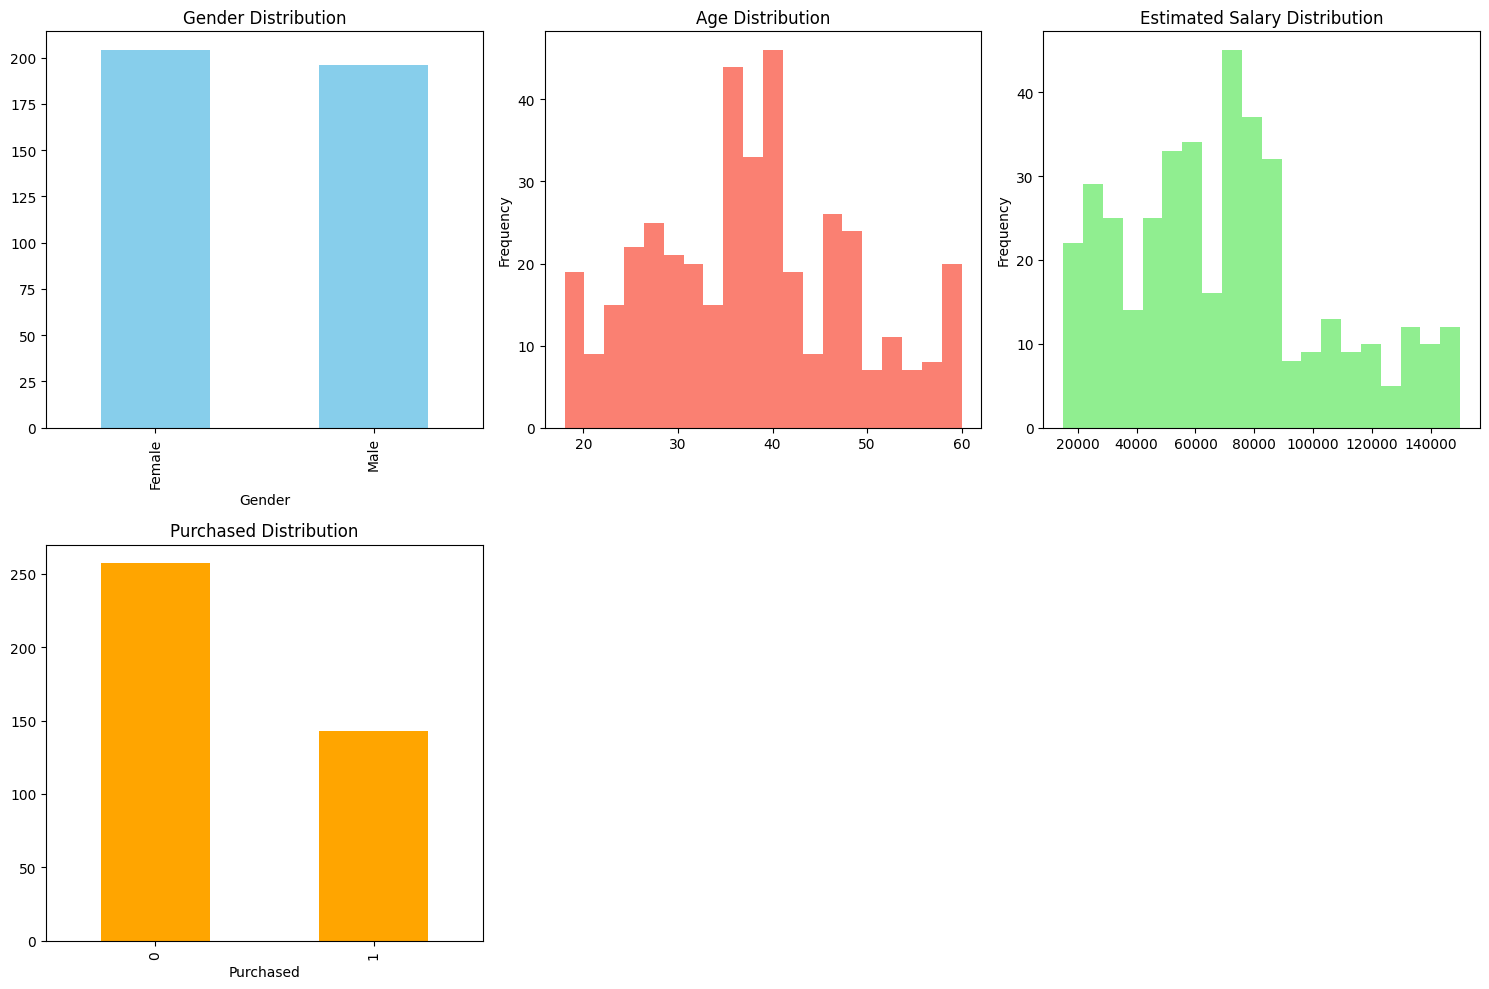

In [ ]:
# write task-3 solution

# start writing your code here


fig, axs = plt.subplots(2, 3, figsize=(15, 10))


df['Gender'].value_counts().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Gender Distribution')


df['Age'].plot(kind='hist', ax=axs[0, 1], color='salmon', bins=20)
axs[0, 1].set_title('Age Distribution')


df['EstimatedSalary'].plot(kind='hist', ax=axs[0, 2], color='lightgreen', bins=20)
axs[0, 2].set_title('Estimated Salary Distribution')


df['Purchased'].value_counts().plot(kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Purchased Distribution')


axs[1, 1].axis('off')
axs[1, 2].axis('off')


plt.tight_layout()


plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

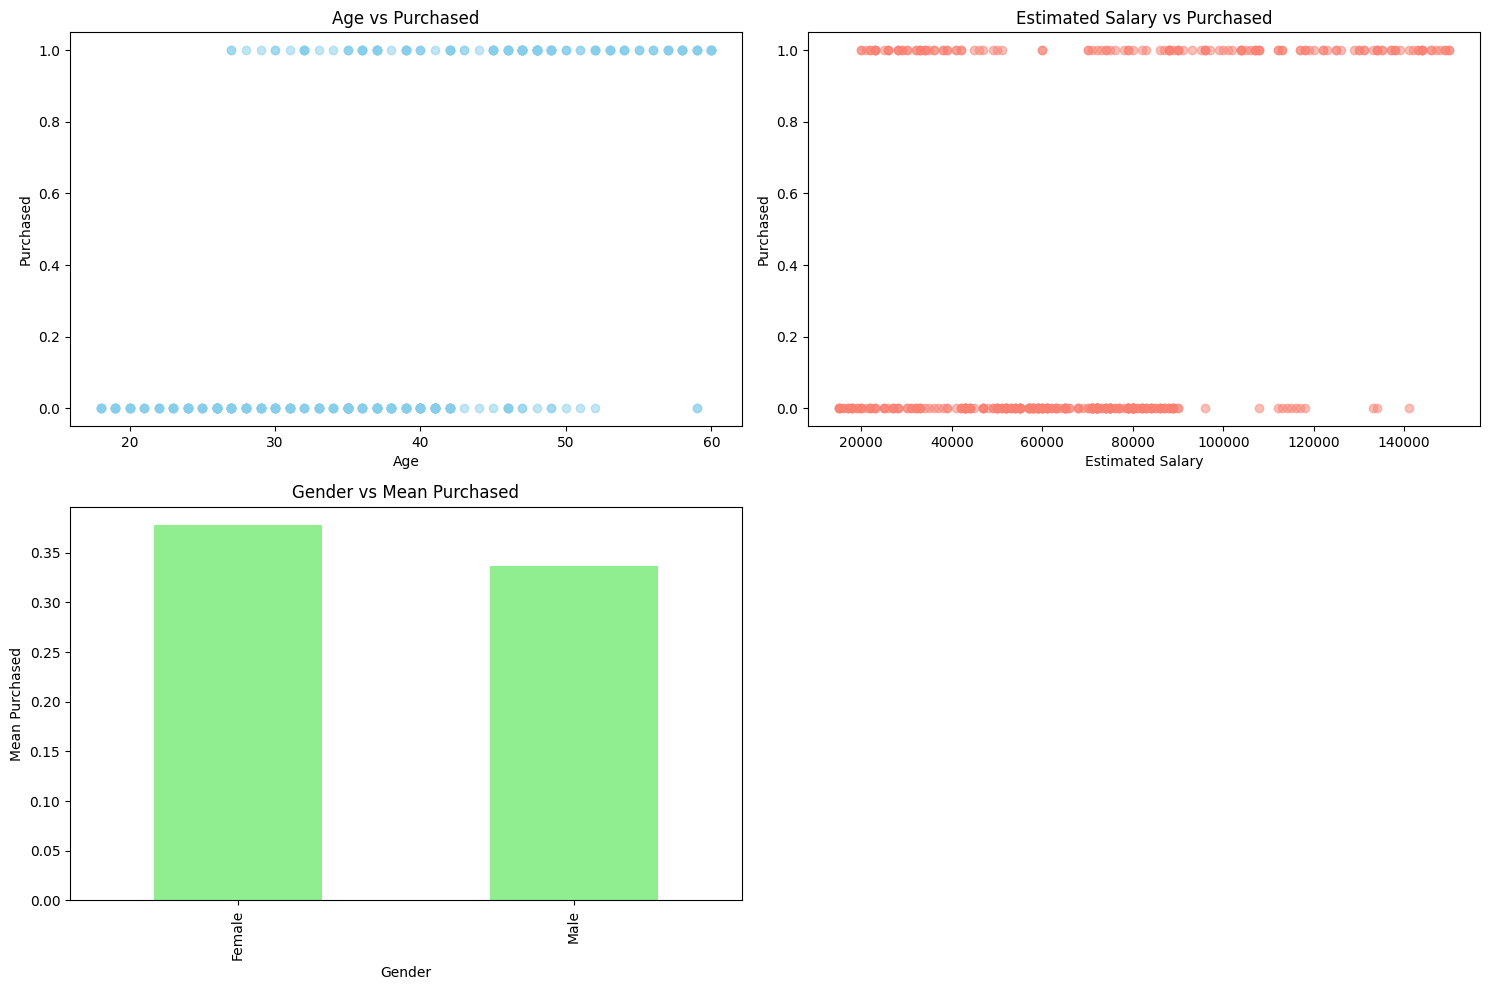

In [ ]:
# write task-4 solution

# start writing your code here

fig, axs = plt.subplots(2, 2, figsize=(15, 10))


axs[0, 0].scatter(df['Age'], df['Purchased'], color='skyblue', alpha=0.5)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Purchased')
axs[0, 0].set_title('Age vs Purchased')


axs[0, 1].scatter(df['EstimatedSalary'], df['Purchased'], color='salmon', alpha=0.5)
axs[0, 1].set_xlabel('Estimated Salary')
axs[0, 1].set_ylabel('Purchased')
axs[0, 1].set_title('Estimated Salary vs Purchased')


gender_purchased = df.groupby('Gender')['Purchased'].mean()
gender_purchased.plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Mean Purchased')
axs[1, 0].set_title('Gender vs Mean Purchased')


axs[1, 1].axis('off')


plt.tight_layout()


plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
# write task-5 solution

# start writing your code here


label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


X = df.drop(columns=['User ID', 'Purchased'])
y = df['Purchased']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


print(X_scaled_df.head())

     Gender       Age  EstimatedSalary
0  1.020204  0.797057         1.387710
1 -0.980196 -1.113206         0.066291
2 -0.980196  1.179110        -1.460681
3  1.020204  0.892570        -1.049573
4  1.020204  0.319491        -0.521006


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [ ]:
# write task-6 solution

# start writing your code here

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=321)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (320, 3)
Shape of X_test: (80, 3)
Shape of y_train: (320,)
Shape of y_test: (80,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
# write task-7 solution

# start writing your code here

naive_bayes_classifier = GaussianNB()


naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[47  6]
 [ 9 18]]


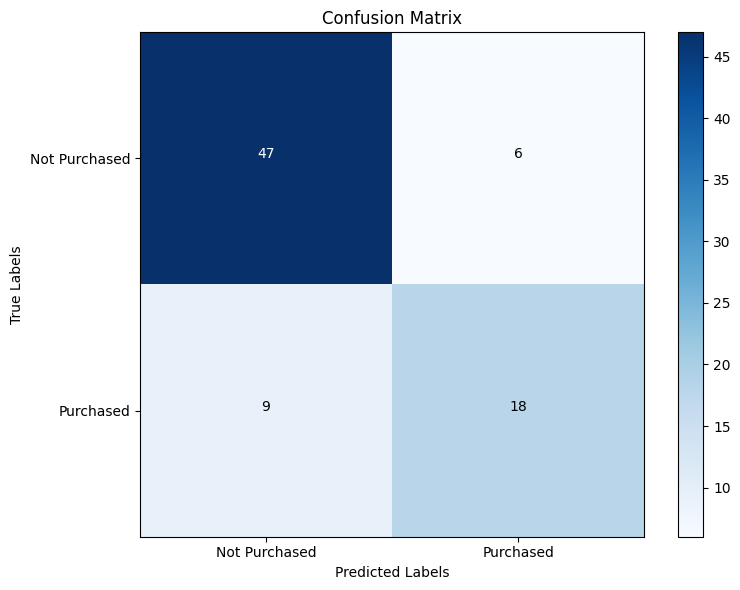

In [ ]:
# write task-8 solution

# start writing your code here

y_pred = naive_bayes_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

y_pred = naive_bayes_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.yticks(tick_marks, ['Not Purchased', 'Purchased'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [ ]:
# write task-9 solution

# start writing your code here


train_accuracy = accuracy_score(y_train, naive_bayes_classifier.predict(X_train))


test_accuracy = accuracy_score(y_test, y_pred)


print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.915625
Test Accuracy: 0.8125


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
# write task-10 solution

# start writing your code here


naive_bayes_classifier = GaussianNB()


cv_scores = cross_val_score(naive_bayes_classifier, X_scaled_df, y, cv=10)


print("Accuracy of Naïve Bayes Classifier (10-fold cross-validation):")
print("Mean:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Accuracy of Naïve Bayes Classifier (10-fold cross-validation):
Mean: 0.885
Standard Deviation: 0.04062019202317982
